# This Notebook contains Table 1, Figure 8b, Figure 8C and Figure 12 Results

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from ast import literal_eval as make_tuple
from scipy.integrate import quad
import magpylib as mp
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
import shutil

In [21]:
def read_complex_binary2(filename):
    """ Read file of float32 into complex array.
    """

    with open(filename, 'rb') as f:
        bytes = f.read()
    data = np.frombuffer(bytes, dtype=np.float32).reshape(-1, 2)
    data = data[:, 0] + 1j*data[:, 1]
    return data

# Read the data
file_path = "/ProjectEspana/oldpcbairbr/"
channel1_mat  = np.zeros((10, 10))  # Low Peak Channel 1
channel2_mat  = np.zeros((10, 10))  #High Peak Channel 1
channel3_mat  = np.zeros((10, 10))  #Low Peak Channel 2
channel4_mat  = np.zeros((10, 10)) #High Peak Channel 2

for files in glob.glob(file_path+"*"):
    single_file = files.split("/")[-1]
    info_list = single_file.split("_")
    #print(info_list)
    channel_value = info_list[1]
    coordinate = info_list[0]
    coordinate = make_tuple(coordinate)
    x = int(coordinate[0]/10)
    y = int(coordinate[1]/10)
    signal = read_complex_binary2(files)
    transformed_fft_sig = np.abs(np.fft.fftshift(np.fft.fft(signal[0:8000000])))
    #peak1 = np.max(transformed_fft_sig[1340000:1370000])
    #peak2 = np.max(transformed_fft_sig[1540000:1570000])
    sig1 = transformed_fft_sig[1340000:1370000]
    sig2 = transformed_fft_sig[1540000:1570000]    
    peak1 = np.mean(sig1[np.argsort(sig1)[-10:]])
    peak2 = np.mean(sig2[np.argsort(sig2)[-10:]])
    if channel_value == "a":
        channel1_mat[x][y] = peak1
        channel2_mat[x][y] = peak2
    elif channel_value == "b":
        channel3_mat[x][y] = peak1
        channel4_mat[x][y] = peak2
print("DONE Processing")

DONE Processing


# Instructions for reproducing Table 1 Results
In the cell below, uncomment the 
file path = "..." 
located in the star section.
The line should be varied based on Table 1 column results that you want to generate.
The prediction errors in each dimension are printed below the field plots for the corresponding dimension

In [30]:
def read_complex_binary2(filename):
    """ Read file of float32 into complex array.
    """

    with open(filename, 'rb') as f:
        bytes = f.read()
    data = np.frombuffer(bytes, dtype=np.float32).reshape(-1, 2)
    data = data[:, 0] + 1j*data[:, 1]
    return data

#****************************************************************
# Modify the following line based on
#file_path = "/ProjectEspana/oldpcbporkbr2/"  # Generates Original (Pork) prediction errors
#file_path = "/ProjectEspana/oldpcbairbr/"  # Generates Original (air) prediction errors
file_path = "/ProjectEspana/oldpcbporkbr3/"  # Generates Unseen (Pork) prediction errors
#*****************************************************************



test_channel1  = np.zeros((10, 10))  # Low Peak Channel 1
test_channel2  = np.zeros((10, 10))  #High Peak Channel 1
test_channel3  = np.zeros((10, 10))  #Low Peak Channel 2
test_channel4  = np.zeros((10, 10)) #High Peak Channel 2

for files in glob.glob(file_path+"*"):
    single_file = files.split("/")[-1]
    info_list = single_file.split("_")
    #print(info_list)
    channel_value = info_list[1]
    coordinate = info_list[0]
    coordinate = make_tuple(coordinate)
    x = int(coordinate[0]/10)
    y = int(coordinate[1]/10)
    signal = read_complex_binary2(files)
    transformed_fft_sig = np.abs(np.fft.fftshift(np.fft.fft(signal[0:8000000])))
    #peak1 = np.max(transformed_fft_sig[1340000:1370000])
    #peak2 = np.max(transformed_fft_sig[1540000:1570000])
    sig1 = transformed_fft_sig[1340000:1370000]
    sig2 = transformed_fft_sig[1540000:1570000]    
    peak1 = np.mean(sig1[np.argsort(sig1)[-10:]])
    peak2 = np.mean(sig2[np.argsort(sig2)[-10:]])
    if channel_value == "a":
        test_channel1[x][y] = peak1
        test_channel2[x][y] = peak2
    elif channel_value == "b":
        test_channel3[x][y] = peak1
        test_channel4[x][y] = peak2
print("DONE Processing")

DONE Processing


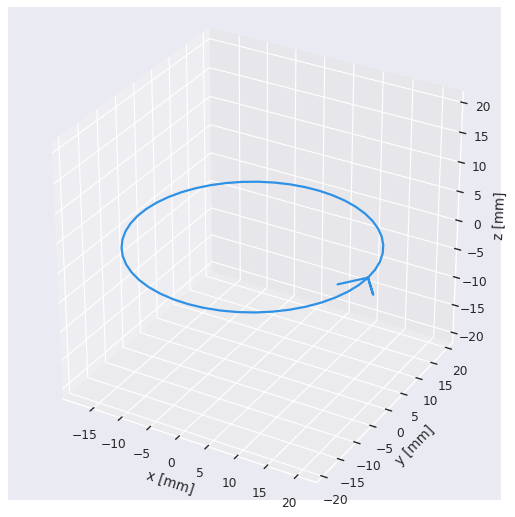

In [31]:
current_loop=mp.current.Loop(current=1,position=(0,0,0),diameter=39)
mp.show(current_loop)
B=np.zeros((40,40,20,3),dtype=float)
for i in range(-200,200,10):
    for j in range(-200,200,10):
        for k in range(50,250,10):
            B[i//10+20,j//10+20,k//10-5]=current_loop.getB((i,j,k))

def get_signal_strength(x,c1,c2,c3,c4,c5,c6,k):
    print(x)
    x,y = x
    current_loop=mp.current.Loop(current=1,position=(0,0,0),diameter=39)
    B1=current_loop.getB((10*x+c2,c3,c1 - 10*y))[2]
    B2=current_loop.getB((10*x+c5,c6,c4 - 10*y))[2]
    return np.abs(B1*B2)*10**k

def get_B1(coordinates):
    x,y = coordinates
    current_loop=mp.current.Loop(current=1,position=(0,0,0),diameter=39)
    B1=current_loop.getB((10*y + 87.3 -170, 0.68 ,-250 + 83.9 + 10*x))[2]
    return B1

def get_B2(coordinates):
    x,y = coordinates
    current_loop=mp.current.Loop(current=1,position=(0,0,0),diameter=39)
    B2=current_loop.getB((10*y + 87.3 -80, 0.68 , 83.9 + 10*x))[2]
    return B2

def get_B3(coordinates):
    x,y = coordinates
    current_loop=mp.current.Loop(current=1,position=(0,0,0),diameter=39)
    B3=current_loop.getB((10*y + 87.3 -80, 0.68 , -250 + 83.9 + 10*x))[2]
    return B3

def get_B4(coordinates):
    x,y = coordinates
    current_loop=mp.current.Loop(current=1,position=(0,0,0),diameter=39)
    B4=current_loop.getB((10*y + 87.3 - 170, 0.68 , 10*x + 83.9))[2]
    return B4

def get_signal_new(channel, coordinates,k):
    if channel == 0:
        BA = get_B1(coordinates)
        BB = get_B3(coordinates)
    elif channel == 1:
        BA = get_B1(coordinates)
        BB = get_B4(coordinates)
    elif channel == 2:
        BA = get_B2(coordinates)
        BB = get_B3(coordinates)
    elif channel == 3:
        BA = get_B2(coordinates)
        BB = get_B4(coordinates)

    return np.abs(BA * BB)*10**k
# current_loop=mp.current.Loop(current=1,position=(0,0,0),diameter=39)
# mp.show(current_loop)
# B=np.zeros((40,40,20,3),dtype=float)
# for i in range(-200,200,10):
#     for j in range(-200,200,10):
#         for k in range(50,250,10):
#             B[i//10+20,j//10+20,k//10-5]=current_loop.getB((i,j,k))

# def get_signal_strength(x,c1,c2,c3,c4,c5,c6,k):
#     print(x)
#     x,y = x
#     current_loop=mp.current.Loop(current=1,position=(0,0,0),diameter=39)
#     B1=current_loop.getB((10*x+c2,c3,c1 - 10*y))[2]
#     B2=current_loop.getB((10*x+c5,c6,c4 - 10*y))[2]
#     return np.abs(B1*B2)*10**k

# def get_B1(coordinates):
#     x,y = coordinates
#     current_loop=mp.current.Loop(current=1,position=(0,0,0),diameter=39)
#     B1=current_loop.getB((-90.6+10*y, -0.8 ,250 - 83.8 - 10*x))[2]
#     return B1

# def get_B2(coordinates):
#     x,y = coordinates
#     current_loop=mp.current.Loop(current=1,position=(0,0,0),diameter=39)
#     B2=current_loop.getB((10*y - 0.6, -0.8 , 83.8 + 10*x))[2]
#     return B2

# def get_B3(coordinates):
#     x,y = coordinates
#     current_loop=mp.current.Loop(current=1,position=(0,0,0),diameter=39)
#     B3=current_loop.getB((10*y - 0.6, -0.8 , 250 - 83.8 - 10*x))[2]
#     return B3

# def get_B4(coordinates):
#     x,y = coordinates
#     current_loop=mp.current.Loop(current=1,position=(0,0,0),diameter=39)
#     B4=current_loop.getB((10*y - 90.6, -0.8 , 10*x + 83.8))[2]
#     return B4

# def get_signal_new(channel, coordinates,k):
#     if channel == 0:
#         BA = get_B1(coordinates)
#         BB = get_B3(coordinates)
#     elif channel == 1:
#         BA = get_B1(coordinates)
#         BB = get_B4(coordinates)
#     elif channel == 2:
#         BA = get_B2(coordinates)
#         BB = get_B3(coordinates)
#     elif channel == 3:
#         BA = get_B2(coordinates)
#         BB = get_B4(coordinates)

#     return np.abs(BA * BB)*10**k

In [32]:
def plot_field(matrix):
    fig = plt.figure(figsize=(10,6))
    ax = plt.axes()
    x = np.arange(8,17,1)
    y = np.arange(8,17,1)
    X, Y = np.meshgrid(x, y)
    Z = matrix
    #ax.set_xticks(np.arange(0,10,1))
    ax.set_xticklabels([0,8,10,12,14,16,18])
    ax.set_yticklabels([0,8,10,12,14,16,18])

    #ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap='viridis', edgecolor='none')
    cmap = ax.imshow(Z)
    ax.set_xlabel('X Location (cm)',fontsize=24,labelpad=7)
    ax.set_ylabel('Y Location (cm)',fontsize=24,labelpad=7)
    ax.tick_params(axis='both', which='major',labelsize=18)
    cbar = fig.colorbar(cmap)
    cbar.ax.tick_params(labelsize=24)
    cbar.set_label(label='RSSI (dB)',size=24)


def plot_model(kparams,m0,m1,m2,m3):
    k = 10.2
    for i in range(0,4):
        print(i)
        fig = plt.figure(figsize=(10,6))
        ax = plt.axes(projection='3d')
        x = np.arange(0,10,1)
        y = np.arange(0,10,1)
        matrix = np.zeros((10,10))
        for xi in x:
            for yi in y:
                if i==0:
                    pidx=2
                elif i==1:
                    pidx=0
                elif i==2:
                    pidx=3
                elif i==4:
                    pidx=1
                matrix[xi][yi] = 20*np.log10(get_signal_new(i,(xi,yi),kparams[pidx]))
        if i ==0:
            print("First Channel MAE:",mean_absolute_error(matrix,m2))
            print(np.mean(np.abs(matrix-m2)))
            print(np.std(np.abs(matrix-m2)))
            matmeas = m2
        elif i == 1:
            print("Second Channel MAE:",mean_absolute_error(matrix,m0))
            print(np.mean(np.abs(matrix-m0)))
            print(np.std(np.abs(matrix-m0)))
            matmeas = m0
        elif i == 2:
            print("Third Channel MAE:",mean_absolute_error(matrix,m3))
            print(np.mean(np.abs(matrix-m3)))
            print(np.std(np.abs(matrix-m3)))
            matmeas = m3
        elif i == 3:
            print("Fourth Channel MAE:",mean_absolute_error(matrix,m1))
            print(np.mean(np.abs(matrix-m1)))
            print(np.std(np.abs(matrix-m1)))
            matmeas = m1
        X, Y = np.meshgrid(x, y)
        Z = matrix
        ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                        cmap='viridis', edgecolor='none')

        ax.set_xlabel('X Location (cm)',fontsize=18,labelpad=7)
        ax.set_ylabel('Y Location (cm)',fontsize=18,labelpad=7)
        ax.set_zlabel('RSSI',fontsize=18,labelpad=7)
        ax.tick_params(axis='both', which='major',labelsize=18)
        ax.zaxis.set_rotate_label(False)  # disable automatic rotation
        ax.set_zlabel('RSSI (dB)', rotation=90,labelpad=7)
        ax.set_xticklabels([0,8,10,12,14,16,18])
        ax.set_yticklabels([0,8,10,12,14,16,18])
        plt.show()
        Z = matmeas
        fig = plt.figure(figsize=(10,6))
        ax = plt.axes(projection='3d') 
        ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                        cmap='viridis', edgecolor='none')
        ax.set_zlabel('RSSI (dB)',fontsize=18,labelpad=7)
        ax.set_xlabel('X Location (cm)',fontsize=18,labelpad=7)
        ax.set_ylabel('Y Location (cm)',fontsize=18,labelpad=7)
        ax.set_xticklabels([0,8,10,12,14,16,18])
        ax.set_yticklabels([0,8,10,12,14,16,18])
        ax.tick_params(axis='both', which='major',labelsize=18)
        ax.zaxis.set_rotate_label(False)  # disable automatic rotation
        ax.set_zlabel('RSSI (dB)', rotation=90,labelpad=7)
        plt.show()

In [33]:
k_params = [np.log10(channel1_mat)[5,5] - np.log10(get_signal_new(1,(5,5),0)),
np.log10(channel2_mat)[5,5] - np.log10(get_signal_new(3,(5,5),0)),
np.log10(channel3_mat)[5,5] - np.log10(get_signal_new(0,(5,5),0)),
np.log10(channel4_mat)[5,5] - np.log10(get_signal_new(2,(5,5),0))]

0
First Channel MAE: 2.132220676535614
2.1322206765356135
1.5649951145119911


/tmp/ipykernel_1584432/3806021447.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0,8,10,12,14,16,18])
/tmp/ipykernel_1584432/3806021447.py:74: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0,8,10,12,14,16,18])


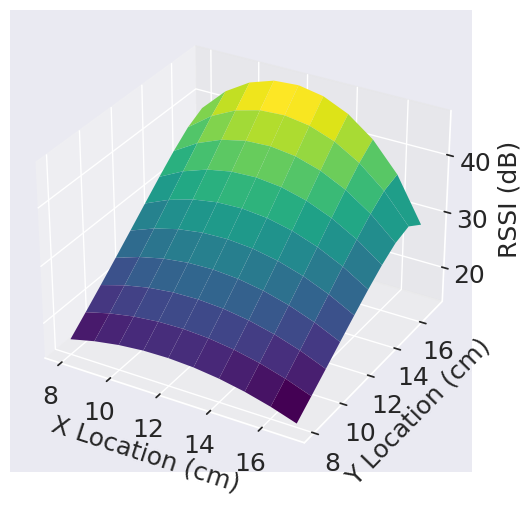

/tmp/ipykernel_1584432/3806021447.py:84: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0,8,10,12,14,16,18])
/tmp/ipykernel_1584432/3806021447.py:85: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0,8,10,12,14,16,18])


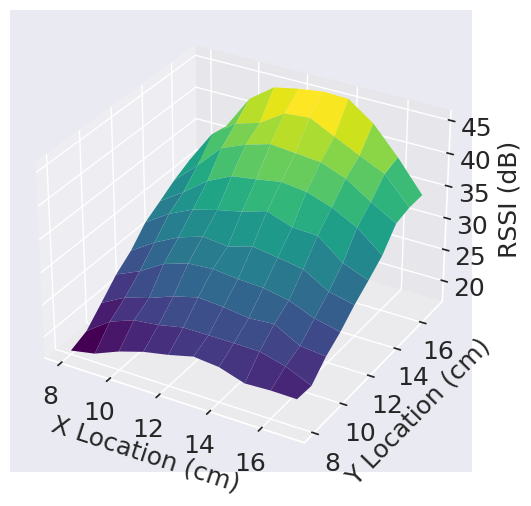

/tmp/ipykernel_1584432/3806021447.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0,8,10,12,14,16,18])
/tmp/ipykernel_1584432/3806021447.py:74: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0,8,10,12,14,16,18])


1
Second Channel MAE: 1.0621538197447555
1.0621538197447558
0.9021183845933003


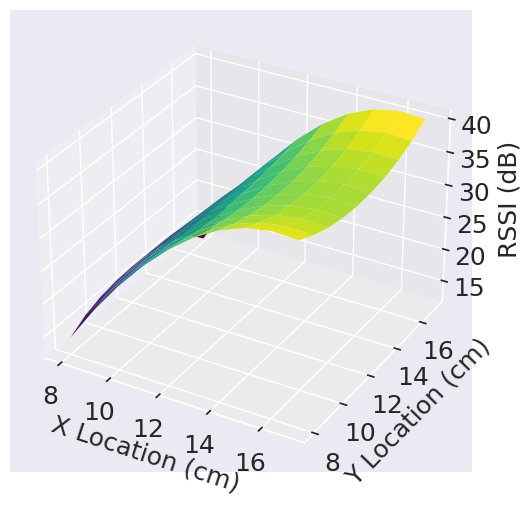

/tmp/ipykernel_1584432/3806021447.py:84: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0,8,10,12,14,16,18])
/tmp/ipykernel_1584432/3806021447.py:85: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0,8,10,12,14,16,18])


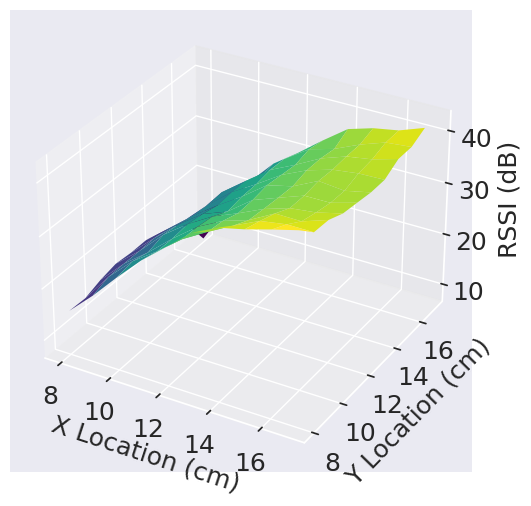

/tmp/ipykernel_1584432/3806021447.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0,8,10,12,14,16,18])
/tmp/ipykernel_1584432/3806021447.py:74: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0,8,10,12,14,16,18])


2
Third Channel MAE: 2.0507472719379445
2.050747271937944
1.5241116057491744


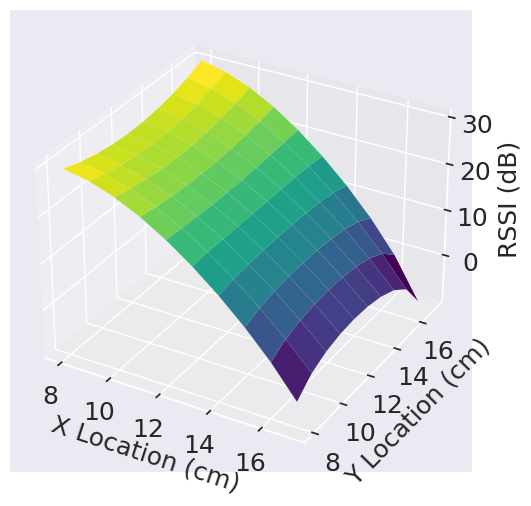

/tmp/ipykernel_1584432/3806021447.py:84: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0,8,10,12,14,16,18])
/tmp/ipykernel_1584432/3806021447.py:85: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0,8,10,12,14,16,18])


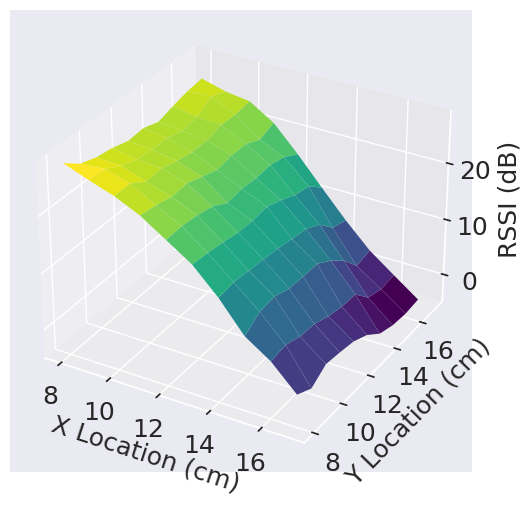

/tmp/ipykernel_1584432/3806021447.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0,8,10,12,14,16,18])
/tmp/ipykernel_1584432/3806021447.py:74: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0,8,10,12,14,16,18])


3
Fourth Channel MAE: 2.498181417278535
2.4981814172785346
1.6632578309264079


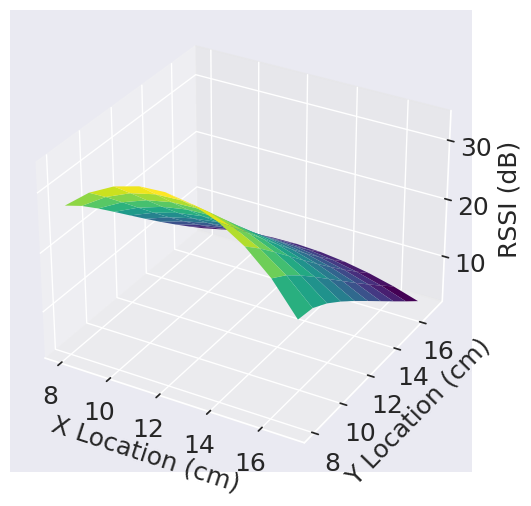

/tmp/ipykernel_1584432/3806021447.py:84: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0,8,10,12,14,16,18])
/tmp/ipykernel_1584432/3806021447.py:85: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0,8,10,12,14,16,18])


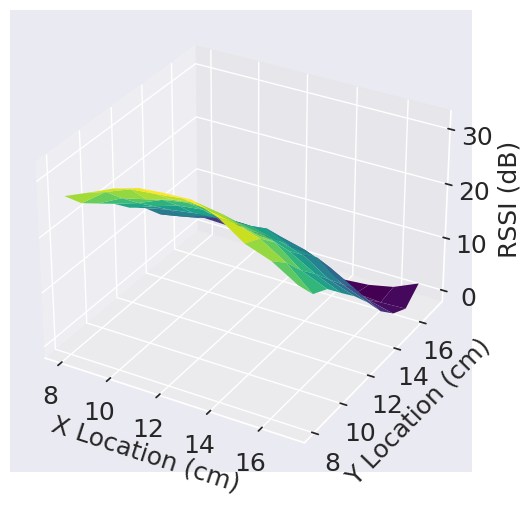

In [34]:
plot_model(k_params,20*np.log10(test_channel1),20*np.log10(test_channel2),20*np.log10(test_channel3),20*np.log10(test_channel4))

In [11]:
diffrssi = np.subtract(20*np.log10(channel1_mat),20*np.log10(test_channel1))
print(np.mean(diffrssi))
diffrssi = np.abs(np.subtract(20*np.log10(channel1_mat),20*np.log10(test_channel1)))

print(np.mean(diffrssi))

1.6864627744566674
1.9678642791158216


0
1
2
3


/tmp/ipykernel_1584432/175420531.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0,8,10,12,14,16,18])
/tmp/ipykernel_1584432/175420531.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0,8,10,12,14,16,18])


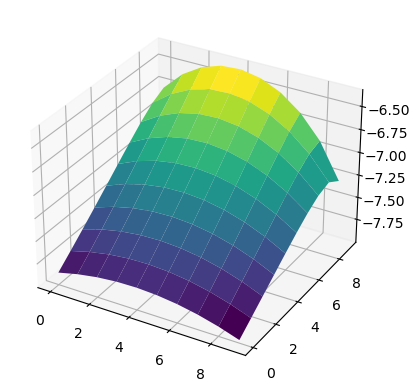

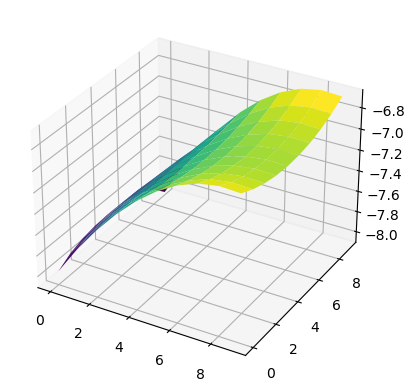

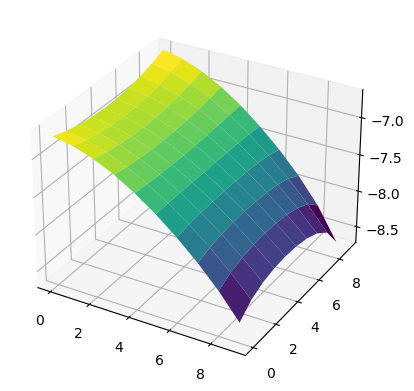

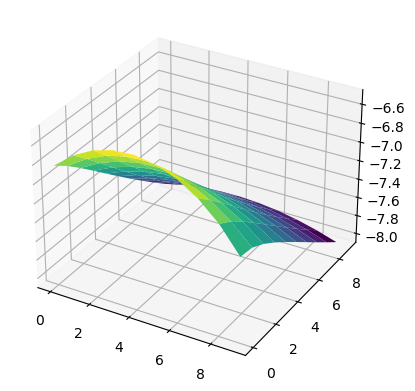

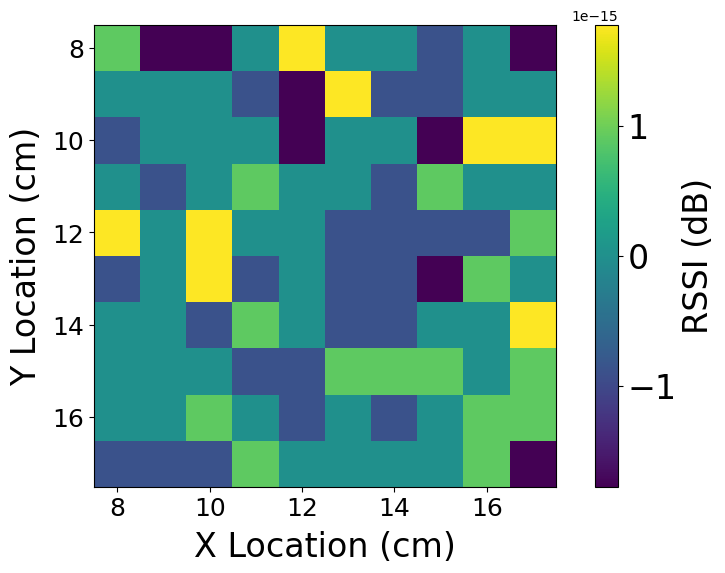

In [12]:
sim_mats = []
for i in range(0,4):
    print(i)
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    x = np.arange(0,10,1)
    y = np.arange(0,10,1)
    X, Y = np.meshgrid(x, y)
    matrix = np.zeros((10,10))
    for xi in x:
        for yi in y:
            matrix[xi][yi] = np.log10(get_signal_new(i,(xi,yi),1))
    ax.plot_surface(X, Y, matrix, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
    #plt.show()
    sim_mats.append(matrix)
nkfig = sim_mats[2] + sim_mats[1] - sim_mats[0] - sim_mats[3]
plot_field(nkfig)

# Figure 12 Plots

In [13]:
def read_complex_binary2(filename):
    """ Read file of float32 into complex array.
    """

    with open(filename, 'rb') as f:
        bytes = f.read()
    data = np.frombuffer(bytes, dtype=np.float32).reshape(-1, 2)
    data = data[:, 0] + 1j*data[:, 1]
    return data

In [14]:
sns.set_theme()

30000


/opt/miniconda3/envs/projectespana/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


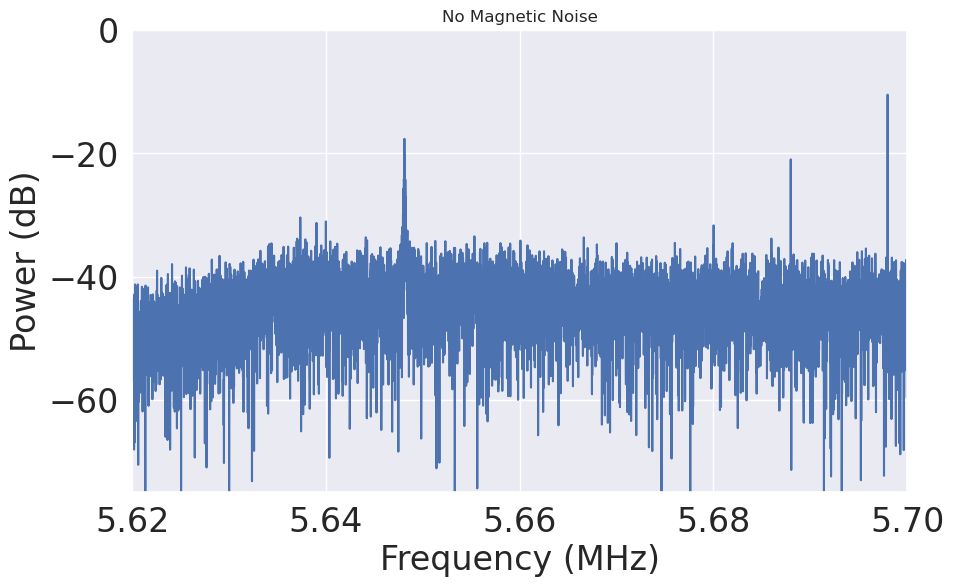

30000


/opt/miniconda3/envs/projectespana/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


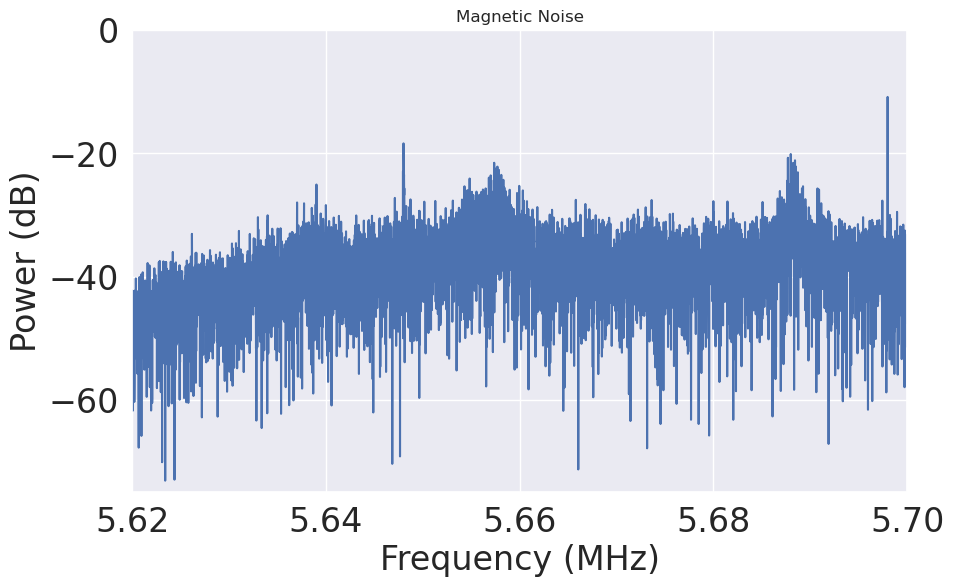

In [20]:
examplefile = "/ProjectEspana/magneticnoise/(0, 0)_a"
signal = read_complex_binary2(examplefile)
examplefile = "/ProjectEspana/magneticnonoise/(0, 0)_a"
signal2 = read_complex_binary2(examplefile)


sig1 = signal[1340000:1370000]
sig2 = signal2[1340000:1370000]
transformed_fft_sig = np.log10(np.fft.fftshift(np.fft.fft(sig1)))
transformed_fft_sig2 = np.log10(np.fft.fftshift(np.fft.fft(sig2)))
fig, ax = plt.subplots(figsize=(10,6))
x_val = np.arange(5.82e6-200e3,5.82e6+200e3,400e3/30000)
print(len(x_val))
ax.tick_params(axis='both', which='major',labelsize=24)
#ax.legend(fontsize=24, loc='upper left')
ax.set_xlabel('Frequency (MHz)',fontsize=24)
ax.set_ylabel('Power (dB)',fontsize=24)
ax.set_xlim([5.62,5.7])
ax.set_ylim([-75,0])
# ax.plot(x_val/1e6, 20*transformed_fft_sig,label = "Magnetic Noise")
# plt.show()
ax.plot(x_val/1e6, 20*transformed_fft_sig2, label = "No Magnetic Noise")
plt.title("No Magnetic Noise")
plt.show()

fig, ax = plt.subplots(figsize=(10,6))
x_val = np.arange(5.82e6-200e3,5.82e6+200e3,400e3/30000)
print(len(x_val))
ax.tick_params(axis='both', which='major',labelsize=24)
#ax.legend(fontsize=24, loc='upper left')
ax.set_xlabel('Frequency (MHz)',fontsize=24)
ax.set_ylabel('Power (dB)',fontsize=24)
ax.set_xlim([5.62,5.7])
ax.set_ylim([-75,0])
ax.plot(x_val/1e6, 20*transformed_fft_sig,label = "Magnetic Noise")
plt.title("Magnetic Noise")
plt.show()
# ax.plot(x_val/1e6, 20*transformed_fft_sig2, label = "No Magnetic Noise")
# plt.show()